# Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions! Please include your code at the end of your submission, or in a separate file. We also accept incomplete solutions.

## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

#### Data description:

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

# Data Analysis Interview Challenge

## Part 1 ‑ Exploratory data analysis 
Exploratory data analysis The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell #This package and the command below allow for the Jupyter notebook
#to print all the outputs and NOT just the final row
InteractiveShell.ast_node_interactivity = "all" #this command allows all outputs to be printed, not just the last command

In [2]:
df = pd.read_json(r'C:\Users\MarceloFuentes\Documents\Springboard\Unit 27 - Mock Interview\1481053515_ultimate_challenge\ultimate_challenge\logins.json')

In [3]:
#log in data
df.shape
df.head()
df.info

(93142, 1)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


<bound method DataFrame.info of                login_time
0     1970-01-01 20:13:18
1     1970-01-01 20:16:10
2     1970-01-01 20:16:37
3     1970-01-01 20:16:36
4     1970-01-01 20:26:21
...                   ...
93137 1970-04-13 18:50:19
93138 1970-04-13 18:43:56
93139 1970-04-13 18:54:02
93140 1970-04-13 18:57:38
93141 1970-04-13 18:54:23

[93142 rows x 1 columns]>

In [4]:
df.set_index('login_time', inplace=True)
df['count'] = 1
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [5]:
df = df.resample('15T').sum()
df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [6]:
df = df.reset_index()
df.columns = ['time', 'logins']
df.head()

,time,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [7]:
#feature engineering
df['day_of_month'] = df.time.dt.day
df['month'] = df.time.dt.month
df['weekday'] = df.time.dt.weekday
df['hour'] = df.time.dt.hour
df['year'] = df.time.dt.year
df.head()

,time,logins,day_of_month,month,weekday,hour,year
0,1970-01-01 20:00:00,2,1,1,3,20,1970
1,1970-01-01 20:15:00,6,1,1,3,20,1970
2,1970-01-01 20:30:00,9,1,1,3,20,1970
3,1970-01-01 20:45:00,7,1,1,3,20,1970
4,1970-01-01 21:00:00,1,1,1,3,21,1970


In [8]:
logins_by_month = df.groupby('month').sum()['logins']
logins_by_hour = df.groupby('hour').sum()['logins']
logins_by_weekday = df.groupby('weekday').sum()['logins']

<Figure size 720x576 with 0 Axes>

<BarContainer object of 4 artists>

Text(0, 0.5, 'Total Login Count')

Text(0.5, 0, 'Month')

Text(0.5, 1.0, 'Total Number of Logins Given By Month')

([<matplotlib.axis.XTick at 0x26faf883fd0>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov')])

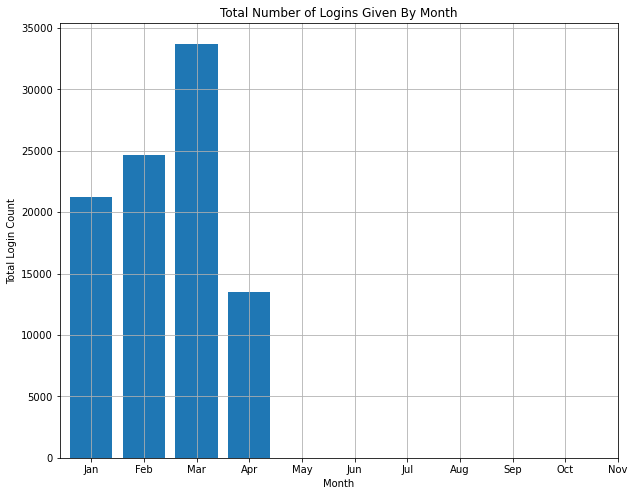

In [9]:
plt.figure(figsize=(10,8))
plt.bar(logins_by_month.index, logins_by_month.values)
plt.ylabel('Total Login Count')
plt.xlabel('Month')
plt.title('Total Number of Logins Given By Month')
plt.xticks(np.arange(1, 12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.grid()

What we can see from this graph is that there is a spike in logins during the month of March (possibly due to some quarter end goal) followed by a subsequent drop in April which could be attributable to a change in season (e.g. beggining of summer) which would explain lower traffic of logins on a month-per-month basis. It should be noted that our dataset does not have any data for the months of May through December and only for the year 1970.

<Figure size 720x576 with 0 Axes>

<BarContainer object of 7 artists>

Text(0, 0.5, 'Total Login Count')

Text(0.5, 0, 'Weekday')

Text(0.5, 1.0, 'Total Number of Logins Given By Weekday')

([<matplotlib.axis.XTick at 0x26fb019a7c0>,
 [Text(0, 0, 'M'),
  Text(0, 0, 'T'),
  Text(0, 0, 'W'),
  Text(0, 0, 'Th'),
  Text(0, 0, 'F'),
  Text(0, 0, 'Sat'),
  Text(0, 0, 'Sun')])

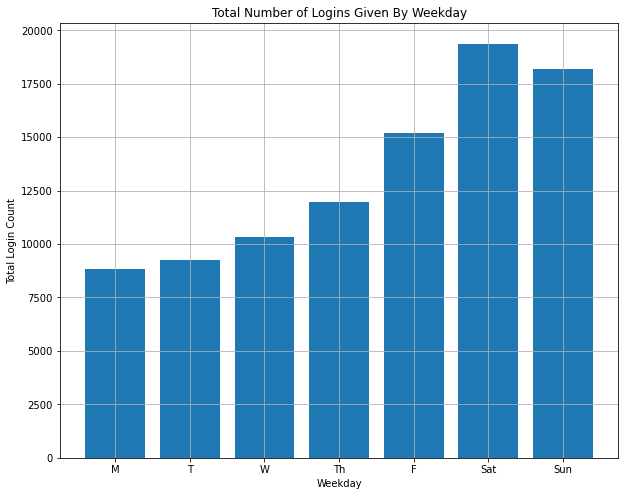

In [10]:
plt.figure(figsize=(10,8))
plt.bar(logins_by_weekday.index, logins_by_weekday.values)
plt.ylabel('Total Login Count')
plt.xlabel('Weekday')
plt.title('Total Number of Logins Given By Weekday')
plt.xticks(np.arange(0, 7),('M','T','W','Th','F','Sat','Sun'))
plt.grid()

Looking at this data and segmenting it by Weekday gives us a more interesting view. There is a clear increasing pattern of logins towards the end of the weekday, peaking on Saturdays with the second highest peak on Sunday. Based on this data, it could be assumed that the logins relate to either a part-time job/hobby since the highest usage/transit occurs on weekends or that this platform is used for leisure on the weekends

<Figure size 720x576 with 0 Axes>

<BarContainer object of 24 artists>

Text(0, 0.5, 'Total Login Count')

Text(0.5, 0, 'Hour of the day')

Text(0.5, 1.0, 'Total Number of Logins Given By Hour of the Day')

([<matplotlib.axis.XTick at 0x26fb034c430>,
 <a list of 24 Text major ticklabel objects>)

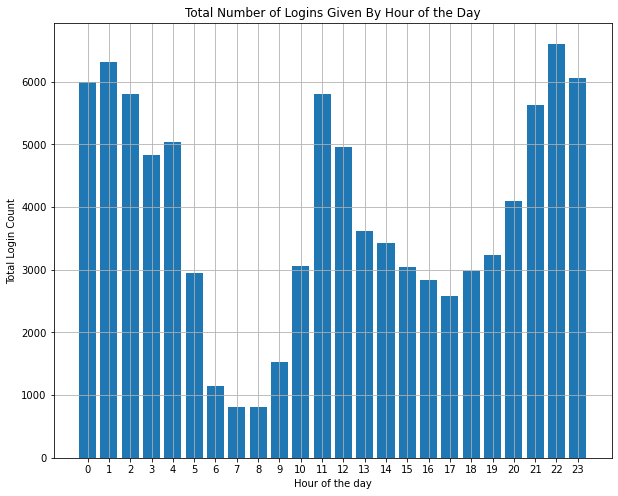

In [11]:
plt.figure(figsize=(10,8))
plt.bar(logins_by_hour.index, logins_by_hour.values)
plt.ylabel('Total Login Count')
plt.xlabel('Hour of the day')
plt.title('Total Number of Logins Given By Hour of the Day')
plt.xticks(np.arange(0, 24))
plt.grid()

Based on this graph, it appears the least amount of logins occur from the hours of 5AM through 9AM, which would defend the theory that was proposed earlier where we stated that this system is likely used for leisure since most of the activity occurs late at night from 9PM through 2/3 AM. With that said, the spike in log ins at 11AM through noon does appear to be anomalous.

### Conclusions

The two major trends that appear to be clear in this dataset are (1) that most of the log ins occur during the non-working hours of the day (9PM-2AM) and (2) that the highest level of activity is typically on both Saturday and Sunday. Furthermore, the activity levels show an upward trend from Monday through Sunday with Monday having the least activity and Saturday having the highest.

## Part 2 ‑ Experiment and metrics design¶

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs. 

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the observation
c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.


### Proposed Methods:

1. The key measure of success would be seeing an increase in ridership of 20% or more month over month and I would choose this metric because the reimbursement of all toll costs should serve as an incentive to increase the overall traffic of partners

2. A practical experiment would be to choose a cohort of 100 driver partners and record their mileage, revenue per ride, total revenue, etc. while being offered this reimbursement policy and compare it to their historical statistics. To implement this experiment we would need to have an application tracking the aforementioned metrics, to establish significance we would need to perform a regression analysis using all riders to see if their metrics would be significantly different month over month. Assuming that the results of the study proved that a significant change was explained by this sample, we would advice rolling out this policy to a larger group before releasing it to the full population to avoid any issues relating to sample bias.

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

#### Data description:

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [12]:
df = pd.read_json(r'C:\Users\MarceloFuentes\Documents\Springboard\Unit 27 - Mock Interview\1481053515_ultimate_challenge\ultimate_challenge\ultimate_data_challenge.json')

In [13]:
#Ultimate data
df.shape
df.head()
df.info()

(50000, 12)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


At first glance it appears we have a very robust dataset except for the variable "avg_rating_of_driver" so at this point we may  either (1) perform an imputation using the mean or (2) drop all rows where this variable is NaN or (3) leave some rows with NaN values. Since this project is about rider retention and the variable "avg_rating_of_driver" is directly impacted by the user experience, performing an imputation might lead to biased results since the rating of the driver will likely be a key variable during our analysis. With that said, we will decide to drop all rows with null values.

In [14]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
#Based on the analysis below the last trip date was 2014-07-01 so we will assume that this is the "current" date 
# for our analysis, furthermore the first sign up date is '2014-01-01' which is six months before our current date
last_trip_dates = df['last_trip_date'].unique()
last_trip_dates = [x for x in last_trip_dates]
last_trip_dates = pd.DataFrame(last_trip_dates, columns = ['last_trip_date'])
last_trip_dates.sort_values(by='last_trip_date')

,last_trip_date
47,2014-01-01
126,2014-01-02
74,2014-01-03
82,2014-01-04
89,2014-01-05
...,...
58,2014-06-27
11,2014-06-28
3,2014-06-29
25,2014-06-30


In [16]:
#Feature engineering to derive whether the driver was retained or not where 1 = retained and 0 = not retained
df['current_date'] = '2014-07-01'
df['current_date'] = pd.to_datetime(df['current_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['diff_signup_to_last_trip'] = df['last_trip_date']-df['signup_date']
df['diff_signup_to_last_trip'] = pd.to_numeric(df['diff_signup_to_last_trip'])/86400000000000
df['diff_current_to_last_trip'] = df['current_date']-df['last_trip_date']
df['diff_current_to_last_trip'] = pd.to_numeric(df['diff_current_to_last_trip'])/86400000000000
df['retained'] = [x for x in df['diff_current_to_last_trip'] <= 30]
df['retained'] = df['retained'].astype(int)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,current_date,diff_signup_to_last_trip,diff_current_to_last_trip,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,2014-07-01,143.0,14.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,2014-07-01,96.0,57.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,2014-07-01,1.0,175.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2014-07-01,170.0,2.0,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,2014-07-01,47.0,108.0,0


In [17]:
df['phone'].unique()

array(['iPhone', 'Android'], dtype=object)

##  3.1 What fraction of the observed users were retained?

In [18]:
retention_rate = np.sum(df['retained'] == 1) / len(df['retained']) * 100
print('The percentage of riders that were retained over a one-month period is: %3.2f%%' % retention_rate)

The percentage of riders that were retained over a one-month period is: 41.10%


## 3.2 Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. 
Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

#### Data description:

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [19]:
#We first must perform our analysis using drivers with a signup date of 2014-01-01
six_month_driver = df[df['signup_date'] == '2014-01-01']
percentage_retained = sum(six_month_driver['retained'])/len(six_month_driver['retained'])*100
print('The percentage of riders that have been retained for 6 months is: %3.2f%%' % percentage_retained)

The percentage of riders that have been retained for 6 months is: 43.90%


The reason we should deploy and train a model that using the number of drivers that have been on the platform since 2014-01-01 is that it is generally speaking best practice to use a historical timeframe that is at a bare minimum equal to the one being forecasted and since we want to determine whether a user will be active on their 6th month in the system, it would be wise to perform our base modeling using this sample and then run the model against the full population to know the percentage of users that can be expected to be still on in six months.

In [20]:
#Feature engineering - to pass some variables to numerical we will use Pandas get dummies
df = pd.get_dummies(six_month_driver, columns=['city', 'phone', 'ultimate_black_user'], drop_first=True)
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,current_date,diff_signup_to_last_trip,diff_current_to_last_trip,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
68,0,2014-01-01,5.0,1.00,2014-06-15,0.0,0.0,4.44,5.0,2014-07-01,165.0,16.0,1,1,0,1,1
71,1,2014-01-01,5.0,1.00,2014-01-01,0.0,100.0,1.02,5.0,2014-07-01,0.0,181.0,0,0,0,0,0
104,3,2014-01-01,3.0,1.00,2014-06-28,0.0,63.6,4.08,4.9,2014-07-01,178.0,3.0,1,0,1,1,1
113,1,2014-01-01,5.0,1.00,2014-03-29,0.0,33.3,10.29,3.7,2014-07-01,87.0,94.0,0,0,1,0,0
141,3,2014-01-01,3.8,1.06,2014-05-25,8.3,41.7,1.68,4.7,2014-07-01,144.0,37.0,0,0,1,0,0


### Modeling

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['last_trip_date', 'signup_date','current_date', 'diff_signup_to_last_trip', 'diff_current_to_last_trip', 'retained']).values
y = df.retained.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [22]:
# Use Random Forest Classifier to perform this test
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test)

print('Random Forest Classifier Test Set Performance: %3.2f' %score)

RandomForestClassifier()

Random Forest Classifier Test Set Performance: 0.74


In [23]:
#Hyperparameter tuning using GridSearch
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': np.arange(50, 100, 200),
    'min_samples_leaf': np.arange(2, 6),
    'min_samples_split': np.arange(2, 12)}

rfc = RandomForestClassifier()
gscv = GridSearchCV(rfc, param_grid=param_grid, cv=3)
gscv.fit(X_train, y_train)

#Best Parameters
gscv.best_params_

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': array([2, 3, 4, 5]),
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'n_estimators': array([50])})

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 50}

In [25]:
#Use Best Parameters in Random Forest Classifier
rfc = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=50)
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test) 
print('Random Forest Classifier Test Set Performance: %3.2f' %score)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=50)

Random Forest Classifier Test Set Performance: 0.77


In [26]:
feature_importances = pd.DataFrame(rfc.feature_importances_, \
                                   index = df.drop(columns=['last_trip_date', 'signup_date','current_date', 'diff_signup_to_last_trip', 'diff_current_to_last_trip', 'retained']).columns, \
                                   columns=['importance']).sort_values('importance', ascending=False)

<Figure size 720x576 with 0 Axes>

<BarContainer object of 11 artists>

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Feature Name')

Text(0.5, 1.0, 'Feature Importance Using Random Forest Classifer')

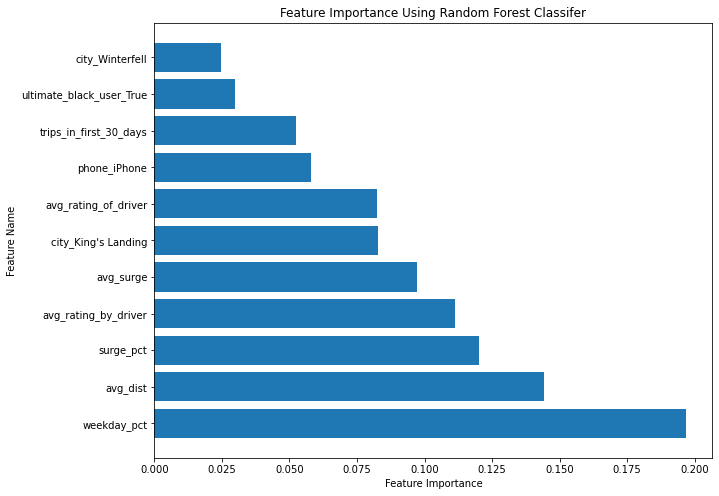

In [27]:
plt.figure(figsize=(10,8))
plt.barh(feature_importances.index, feature_importances.importance.values)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Using Random Forest Classifer')

In [38]:
#Now using our trained Random Forest Classifier we will make a prediction for the rest of the drivers
df = pd.read_json(r'C:\Users\MarceloFuentes\Documents\Springboard\Unit 27 - Mock Interview\1481053515_ultimate_challenge\ultimate_challenge\ultimate_data_challenge.json')
df['current_date'] = '2014-07-01'
df['current_date'] = pd.to_datetime(df['current_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['diff_signup_to_last_trip'] = df['last_trip_date']-df['signup_date']
df['diff_signup_to_last_trip'] = pd.to_numeric(df['diff_signup_to_last_trip'])/86400000000000
df['diff_current_to_last_trip'] = df['current_date']-df['last_trip_date']
df['diff_current_to_last_trip'] = pd.to_numeric(df['diff_current_to_last_trip'])/86400000000000
df['retained'] = [x for x in df['diff_current_to_last_trip'] <= 30]
df['retained'] = df['retained'].astype(int)
df = pd.get_dummies(df, columns=['city', 'phone', 'ultimate_black_user'], drop_first=True)
df = df.dropna()
X = df.drop(columns=['last_trip_date', 'signup_date','current_date', 'diff_signup_to_last_trip', 'diff_current_to_last_trip', 'retained']).values
y = df.retained.values
y_predict = rfc.predict(X)
retention_rate_6_months = sum(y_predict/len(y_predict))
print('Random Forest Classifier Test Set predicts the 6 months retention rate will be: %3.2f' %retention_rate_6_months)
print('This model is 77% accurate per the metrics we got using our sample')

Random Forest Classifier Test Set predicts the 6 months retention rate will be: 0.38
This model is 77% accurate per the metrics we got using our sample


## 3.3 Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

Ultimate might leverage the insights from this model by budgeting to hire 3x the amount of people 2.6x (0.38^-1) their current fleet size every six months to ensure that their overall driver partner amount does not drop. If targetted efforts were to be put to try to increase the retention rate of drivers in the upcoming months or years, based on the Random Forest feature importance graph, we could infer that giving incentives to drivers to take on more weekday passengers, and trying to match good drivers with good customers would be ideal. Since the percentage of weekday business and the quality of the passengers (based on average rating by the drivers) are two key features in keeping drivers on the platform.